In [1]:
import visual_behavior_glm.src.GLM_params as glm_params
import visual_behavior_glm.src.GLM_analysis_tools as gat
from visual_behavior_glm.src.glm import GLM
import matplotlib.pyplot as plt
import visual_behavior.data_access.loading as loading
import visual_behavior.database as db
import plotly.express as px

import pandas as pd
import numpy as np
import os

import seaborn as sns

/home/dougo/.conda/envs/visual_behavior/lib/python3.8/visual_behavior_glm/src/GLM_params.py:259: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if drop is not 'Full':
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_api/behavior_ophys_nwb_api.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
%matplotlib notebook
%widescreen

In [3]:
results_all = gat.retrieve_results(results_type='full')

In [4]:
rs = gat.retrieve_results(search_dict = {'glm_version': '4_L2_optimize_by_cell'}, results_type='summary')
rs

_id  index           dropout  \
0        5f22221a7eeb3a3cbb69c983      0              Full   
1        5f22221a7eeb3a3cbb69c984      1         intercept   
2        5f22221a7eeb3a3cbb69c985      2              time   
3        5f22221a7eeb3a3cbb69c986      3         pre_licks   
4        5f22221a7eeb3a3cbb69c987      4        post_licks   
...                           ...    ...               ...   
1365755  5f24621b2ac3d684bf7369e9     27  model_omissions1   
1365756  5f24621b2ac3d684bf7369ea     28    model_timing1D   
1365757  5f24621b2ac3d684bf7369eb     29        all-images   
1365758  5f24621b2ac3d684bf7369ec     30            visual   
1365759  5f24621b2ac3d684bf7369ed     31         beh_model   

         variance_explained  fraction_change_from_full  \
0                  0.229436                   0.000000   
1                  0.229937                   0.002183   
2                  0.229769                   0.001453   
3                  0.229634                   0.000864   
4                  0.227139                  -0.010010   
...                     ...                        ...   
1365755            0.048034                   0.048249   
1365756            0.048441                   0.057133   
1365757            0.039222                  -0.144061   
1365758            0.034920                  -0.237943   
1365759            0.057378                   0.252150   

         absolute_change_from_full  cell_specimen_id  ophys_experiment_id  \
0                         0.000000        1017215561            991852008   
1                         0.000501        1017215561            991852008   
2                         0.000333        1017215561            991852008   
3                         0.000198        1017215561            991852008   
4                        -0.002297        1017215561            991852008   
...                            ...               ...                  ...   
1365755                   0.002211         962642740            808621034   
1365756                   0.002618         962642740            808621034   
1365757                  -0.006601         962642740            808621034   
1365758                  -0.010903         962642740            808621034   
1365759                   0.011554         962642740            808621034   

         ophys_session_id  behavior_session_id  container_id  \
0               991639544            991662910    1018028067   
1               991639544            991662910    1018028067   
2               991639544            991662910    1018028067   
3               991639544            991662910    1018028067   
4               991639544            991662910    1018028067   
...                   ...                  ...           ...   
1365755         808340530            808432167     803589437   
1365756         808340530            808432167     803589437   
1365757         808340530            808432167     803589437   
1365758         808340530            808432167     803589437   
1365759         808340530            808432167     803589437   

                     project_code container_workflow_state  \
0        VisualBehaviorMultiscope                  holding   
1        VisualBehaviorMultiscope                  holding   
2        VisualBehaviorMultiscope                  holding   
3        VisualBehaviorMultiscope                  holding   
4        VisualBehaviorMultiscope                  holding   
...                           ...                      ...   
1365755            VisualBehavior             container_qc   
1365756            VisualBehavior             container_qc   
1365757            VisualBehavior             container_qc   
1365758            VisualBehavior             container_qc   
1365759            VisualBehavior             container_qc   

        experiment_workflow_state               session_name  \
0                          passed   20191202_479839_6imagesB   
1                    

In [41]:
rs['identifier'] = rs['ophys_experiment_id'].astype(str) + '_' +  rs['cell_specimen_id'].astype(str)

In [42]:
cutoff = 0.01
cells_to_keep = rs.query('dropout == "Full" and variance_explained >= @cutoff')['identifier'].unique()

In [43]:
rsp = rs.query('identifier in @cells_to_keep').pivot(index='identifier',columns='dropout',values='fraction_change_from_full').reset_index()
rsp

dropout             identifier  Full  all-images  beh_model    change  \
0        1000743008_1003146172   0.0   -0.140223  -0.001848  0.000581   
1        1000743008_1003146180   0.0   -0.155019   0.004636  0.000530   
2        1000743008_1003146183   0.0   -0.210215   0.062499  0.000224   
3        1000743008_1003146186   0.0   -0.368535   0.021722  0.000232   
4        1000743008_1003146190   0.0   -0.089674   0.000823  0.000713   
...                        ...   ...         ...        ...       ...   
26790      995439942_994309997   0.0   -0.673633   0.086221  0.006062   
26791      995439942_994310000   0.0   -0.485011   0.007001  0.004174   
26792      995439942_994310003   0.0   -1.118526   0.042506  0.000775   
26793      995439942_994310018   0.0   -0.541743   0.006398  0.003886   
26794      995439942_994310024   0.0   -0.277435   0.013547  0.000625   

dropout  correct_rejects  false_alarms      hits    image0    image1  \
0               0.014875      0.008197  0.005280 -0.000634  0.003108   
1               0.020636      0.011811  0.003584  0.002961  0.003979   
2               0.002435      0.001871  0.001834  0.001881  0.002758   
3               0.002308      0.006869  0.002990 -0.001212 -0.003161   
4               0.027508      0.019429  0.006967  0.006088  0.004045   
...                  ...           ...       ...       ...       ...   
26790           0.071843      0.050225  0.058348 -0.005161  0.010604   
26791           0.067006      0.025908  0.024597  0.014368  0.014290   
26792           0.003791      0.001357  0.004339  0.000590 -0.000652   
26793           0.040050      0.036957  0.039209  0.019981 -0.008514   
26794           0.005525      0.004325  0.005053  0.000903  0.003351   

dropout    image2    image3    image4    image5    image6    image7  \
0        0.002692  0.001819  0.003621 -0.001186 -0.026248  0.002645   
1       -0.007203 -0.007210  0.002283 -0.018611  0.002152  0.002657   
2       -0.015761  0.000383  0.000302 -0.012279  0.008475  0.001058   
3        0.000206 -0.049498  0.001615 -0.021775  0.000046  0.002221   
4       -0.003198 -0.024926  0.003739  0.002454 -0.000550  0.008610   
...           ...       ...       ...       ...       ...       ...   
26790    0.016987  0.005398  0.010657  0.016359 -0.052912 -0.017866   
26791   -0.012931  0.007199  0.001583  0.006884 -0.065082  0.001343   
26792   -0.001458 -0.001410 -0.000970 -0.000321 -0.008589 -0.000520   
26793    0.007828  0.020179 -0.061918  0.016950  0.010580  0.016852   
26794   -0.001719  0.001421 -0.030594  0.001062  0.001363 -0.003418   

dropout  image_expectation  intercept    misses  model_bias  model_omissions1  \
0                 0.000947   0.000913 -0.001280   -0.001924          0.000501   
1                 0.000976   0.000081  0.006030    0.000728          0.001277   
2                -0.001232  -0.002156  0.000572    0.010619          0.029392   
3                -0.003134   0.003374  0.002284    0.014580          0.006673   
4                 0.001467   0.000038  0.000181   -0.000054          0.001188   
...                    ...        ...       ...         ...               ...   
26790             0.012319  -0.013133  0.032441   -0.187010         -0.042443   
26791             0.007638  -0.000912  0.030111    0.004711         -0.006249   
26792            -0.000430  -0.006349  0.001093    0.000506         -0.102949   
26793             0.011578  -0.000300  0.020430    0.004984         -0.013852   
26794            -0.000713  -0.001291  0.003148    0.004363          0.003764   

dropout  model_task0  model_timing1D  omissions  post_lick_bouts  post_licks  \
0          -0.000538        0.000135   0.008544         0.007587   -0.005937   
1           0.000856        0.002049   0.020436         0.001011    0.003103   
2          -0.001927        0.021750  -0.000316        -0.004966    0.002149   
3           0.005393       -0.001058   0.002760        -0.001018    0.000574   
4           0.000657       -0.00

In [44]:
rspm = rsp.merge(rs[['identifier','cre_line','cell_specimen_id','session_type','equipment_name']].drop_duplicates(),left_on='identifier',right_on='identifier',how='left')

def map_session_types(session_type):
    session_id = session_type[6:7]
    return session_id
rspm['session_id'] = rspm['session_type'].map(lambda st:map_session_types(st))

rspm

identifier  Full  all-images  beh_model    change  \
0      1000743008_1003146172   0.0   -0.140223  -0.001848  0.000581   
1      1000743008_1003146180   0.0   -0.155019   0.004636  0.000530   
2      1000743008_1003146183   0.0   -0.210215   0.062499  0.000224   
3      1000743008_1003146186   0.0   -0.368535   0.021722  0.000232   
4      1000743008_1003146190   0.0   -0.089674   0.000823  0.000713   
...                      ...   ...         ...        ...       ...   
26790    995439942_994309997   0.0   -0.673633   0.086221  0.006062   
26791    995439942_994310000   0.0   -0.485011   0.007001  0.004174   
26792    995439942_994310003   0.0   -1.118526   0.042506  0.000775   
26793    995439942_994310018   0.0   -0.541743   0.006398  0.003886   
26794    995439942_994310024   0.0   -0.277435   0.013547  0.000625   

       correct_rejects  false_alarms      hits    image0    image1    image2  \
0             0.014875      0.008197  0.005280 -0.000634  0.003108  0.002692   
1             0.020636      0.011811  0.003584  0.002961  0.003979 -0.007203   
2             0.002435      0.001871  0.001834  0.001881  0.002758 -0.015761   
3             0.002308      0.006869  0.002990 -0.001212 -0.003161  0.000206   
4             0.027508      0.019429  0.006967  0.006088  0.004045 -0.003198   
...                ...           ...       ...       ...       ...       ...   
26790         0.071843      0.050225  0.058348 -0.005161  0.010604  0.016987   
26791         0.067006      0.025908  0.024597  0.014368  0.014290 -0.012931   
26792         0.003791      0.001357  0.004339  0.000590 -0.000652 -0.001458   
26793         0.040050      0.036957  0.039209  0.019981 -0.008514  0.007828   
26794         0.005525      0.004325  0.005053  0.000903  0.003351 -0.001719   

         image3    image4    image5    image6    image7  image_expectation  \
0      0.001819  0.003621 -0.001186 -0.026248  0.002645           0.000947   
1     -0.007210  0.002283 -0.018611  0.002152  0.002657           0.000976   
2      0.000383  0.000302 -0.012279  0.008475  0.001058          -0.001232   
3     -0.049498  0.001615 -0.021775  0.000046  0.002221          -0.003134   
4     -0.024926  0.003739  0.002454 -0.000550  0.008610           0.001467   
...         ...       ...       ...       ...       ...                ...   
26790  0.005398  0.010657  0.016359 -0.052912 -0.017866           0.012319   
26791  0.007199  0.001583  0.006884 -0.065082  0.001343           0.007638   
26792 -0.001410 -0.000970 -0.000321 -0.008589 -0.000520          -0.000430   
26793  0.020179 -0.061918  0.016950  0.010580  0.016852           0.011578   
26794  0.001421 -0.030594  0.001062  0.001363 -0.003418          -0.000713   

       intercept    misses  model_bias  model_omissions1  model_task0  \
0       0.000913 -0.001280   -0.001924          0.000501    -0.000538   
1       0.000081  0.006030    0.000728          0.001277     0.000856   
2      -0.002156  0.000572    0.010619          0.029392    -0.001927   
3       0.003374  0.002284    0.014580          0.006673     0.005393   
4       0.000038  0.000181   -0.000054          0.001188     0.000657   
...          ...       ...         ...               ...          ...   
26790  -0.013133  0.032441   -0.187010         -0.042443     0.019241   
26791  -0.000912  0.030111    0.004711         -0.006249     0.001660   
26792  -0.006349  0.001093    0.000506         -0.102949    -0.001359   
26793  -0.000300  0.020430    0.004984         -0.013852    -0.001372   
26794  -0.001291  0.003148    0.004363          0.003764     0.001219   

       model_timing1D  omissions  post_lick_bouts  post_licks  pre_lick_bouts  \
0            0.000135   0.008544         0.007587   -0.005937        0.011424   
1            0.002049   0.020436         0.001011    0.003103        0.031004   
2            0.021750  -0.000316        -0.004966    0.002149        0.003036   
3           -0.001058   0.002760        -0.001018    0.000574     

In [45]:
cols_for_clustering = [col for col in rspm.columns if col not in ['visual','identifier','cre_line','session_type','equipment_name', 'session_id', 'cell_specimen_id']]
cols_for_clustering

['Full',
 'all-images',
 'beh_model',
 'change',
 'correct_rejects',
 'false_alarms',
 'hits',
 'image0',
 'image1',
 'image2',
 'image3',
 'image4',
 'image5',
 'image6',
 'image7',
 'image_expectation',
 'intercept',
 'misses',
 'model_bias',
 'model_omissions1',
 'model_task0',
 'model_timing1D',
 'omissions',
 'post_lick_bouts',
 'post_licks',
 'pre_lick_bouts',
 'pre_licks',
 'pupil',
 'rewards',
 'running',
 'time']

In [46]:
sorted_cols = rspm[cols_for_clustering].median(axis=0).sort_values().index

In [47]:
rspm.set_index('identifier')[sorted_cols].sort_values(by=['all-images','running'])

all-images   running     pupil  Full    image4  \
identifier                                                             
846487947_961985164   -13.206204  1.216737 -0.480915   0.0 -0.041766   
822647135_962554101   -10.171026  0.101770 -0.003982   0.0  0.026690   
848694639_962574986    -9.040117 -0.014500 -3.010270   0.0 -0.004812   
974384470_1007092516   -8.912741 -0.452497  0.261638   0.0  0.033379   
826585773_961885003    -8.606362  0.084364 -0.153492   0.0 -0.353953   
...                          ...       ...       ...   ...       ...   
844395446_961985428     1.637859 -0.266629 -3.165451   0.0 -0.013241   
826585773_961880837     1.664575 -0.120754 -0.374723   0.0  0.082283   
993862120_993614239     1.720064 -0.070957 -3.296149   0.0  0.064734   
795076128_962594029     1.823503  0.071054  0.018576   0.0 -0.001210   
945586425_1028835794    2.189148  0.681069 -4.206540   0.0  0.025518   

                        change    image7    image0    image5  post_licks  \
identifier                                                                 
846487947_961985164   0.042602  0.040312  0.018240 -0.329811    0.067418   
822647135_962554101   0.000789  0.049128  0.041075  0.061628    0.050831   
848694639_962574986   0.003548  0.059354  0.053438 -0.050740    0.015879   
974384470_1007092516  0.000678  0.000846 -0.152486  0.034992    0.003034   
826585773_961885003   0.002084 -0.018688 -0.001197  0.050314    0.149187   
...                        ...       ...       ...       ...         ...   
844395446_961985428   0.009575 -0.004494  0.212116  0.006470    0.083023   
826585773_961880837  -0.009050  0.039196 -0.002985  0.096527    0.037259   
993862120_993614239   0.000417  0.090325  0.042638  0.106502    0.156520   
795076128_962594029   0.002441  0.012220  0.014616  0.009131    0.009329   
945586425_1028835794  0.023298 -0.034239 -0.009970  0.080015    0.022303   

                        image3  intercept    image6    image1    image2  \
identifier                                                                
846487947_961985164   0.076178  -0.018807  0.023480  0.043971  0.063961   
822647135_962554101   0.040118   0.036485  0.024198  0.037167 -0.105839   
848694639_962574986  -0.175339   1.006192  0.017608  0.037880 -0.043053   
974384470_1007092516  0.088963   0.002936  0.023562  0.001872  0.047357   
826585773_961885003   0.048022  -0.090127  0.097819  0.034801  0.103586   
...                        ...        ...       ...       ...       ...   
844395446_961985428   0.001690   0.030882 -0.018426  0.054293  0.015282   
826585773_961880837  -0.023575  -0.416039  0.140778 -0.015625  0.042823   
993862120_993614239   0.161103   0.209259  0.052941  0.048951  0.094885   
795076128_962594029   0.222737   0.037742  0.001493  0.014135  0.023411   
945586425_1028835794  0.022597  -0.554172 -0.005518  0.012773  0.083912   

                          time  image_expectation  post_lick_bouts  \
identifier                                                           
846487947_961985164   0.429513           0.018810         0.041542   
822647135_962554101  -0.611550           0.019462         0.001391   
848694639_962574986   1.647520           0.046154         0.035147   
974384470_1007092516  0.197254           0.016605         0.000395   
826585773_961885003   1.740260           0.031522         0.032812   
...                        ...                ...              ...   
844395446_961985428  -1.151339           0.006490        -0.071944   
826585773_961880837   2.678429           0.067688         0.023722   
993862120_993614239   0.635113           0.176457         0.054434   
795076128_962594029  -0.155544           0.008414         0.023552   
945586425_1028835794 -0.170109           0.046613         0.013294   

                      model_omissions1  model_task0  model_timing1D  \
identifier                                                            
846487947_961985164          -0.906916     0.841591        1.209437

<IPython.core.display.Javascript object>


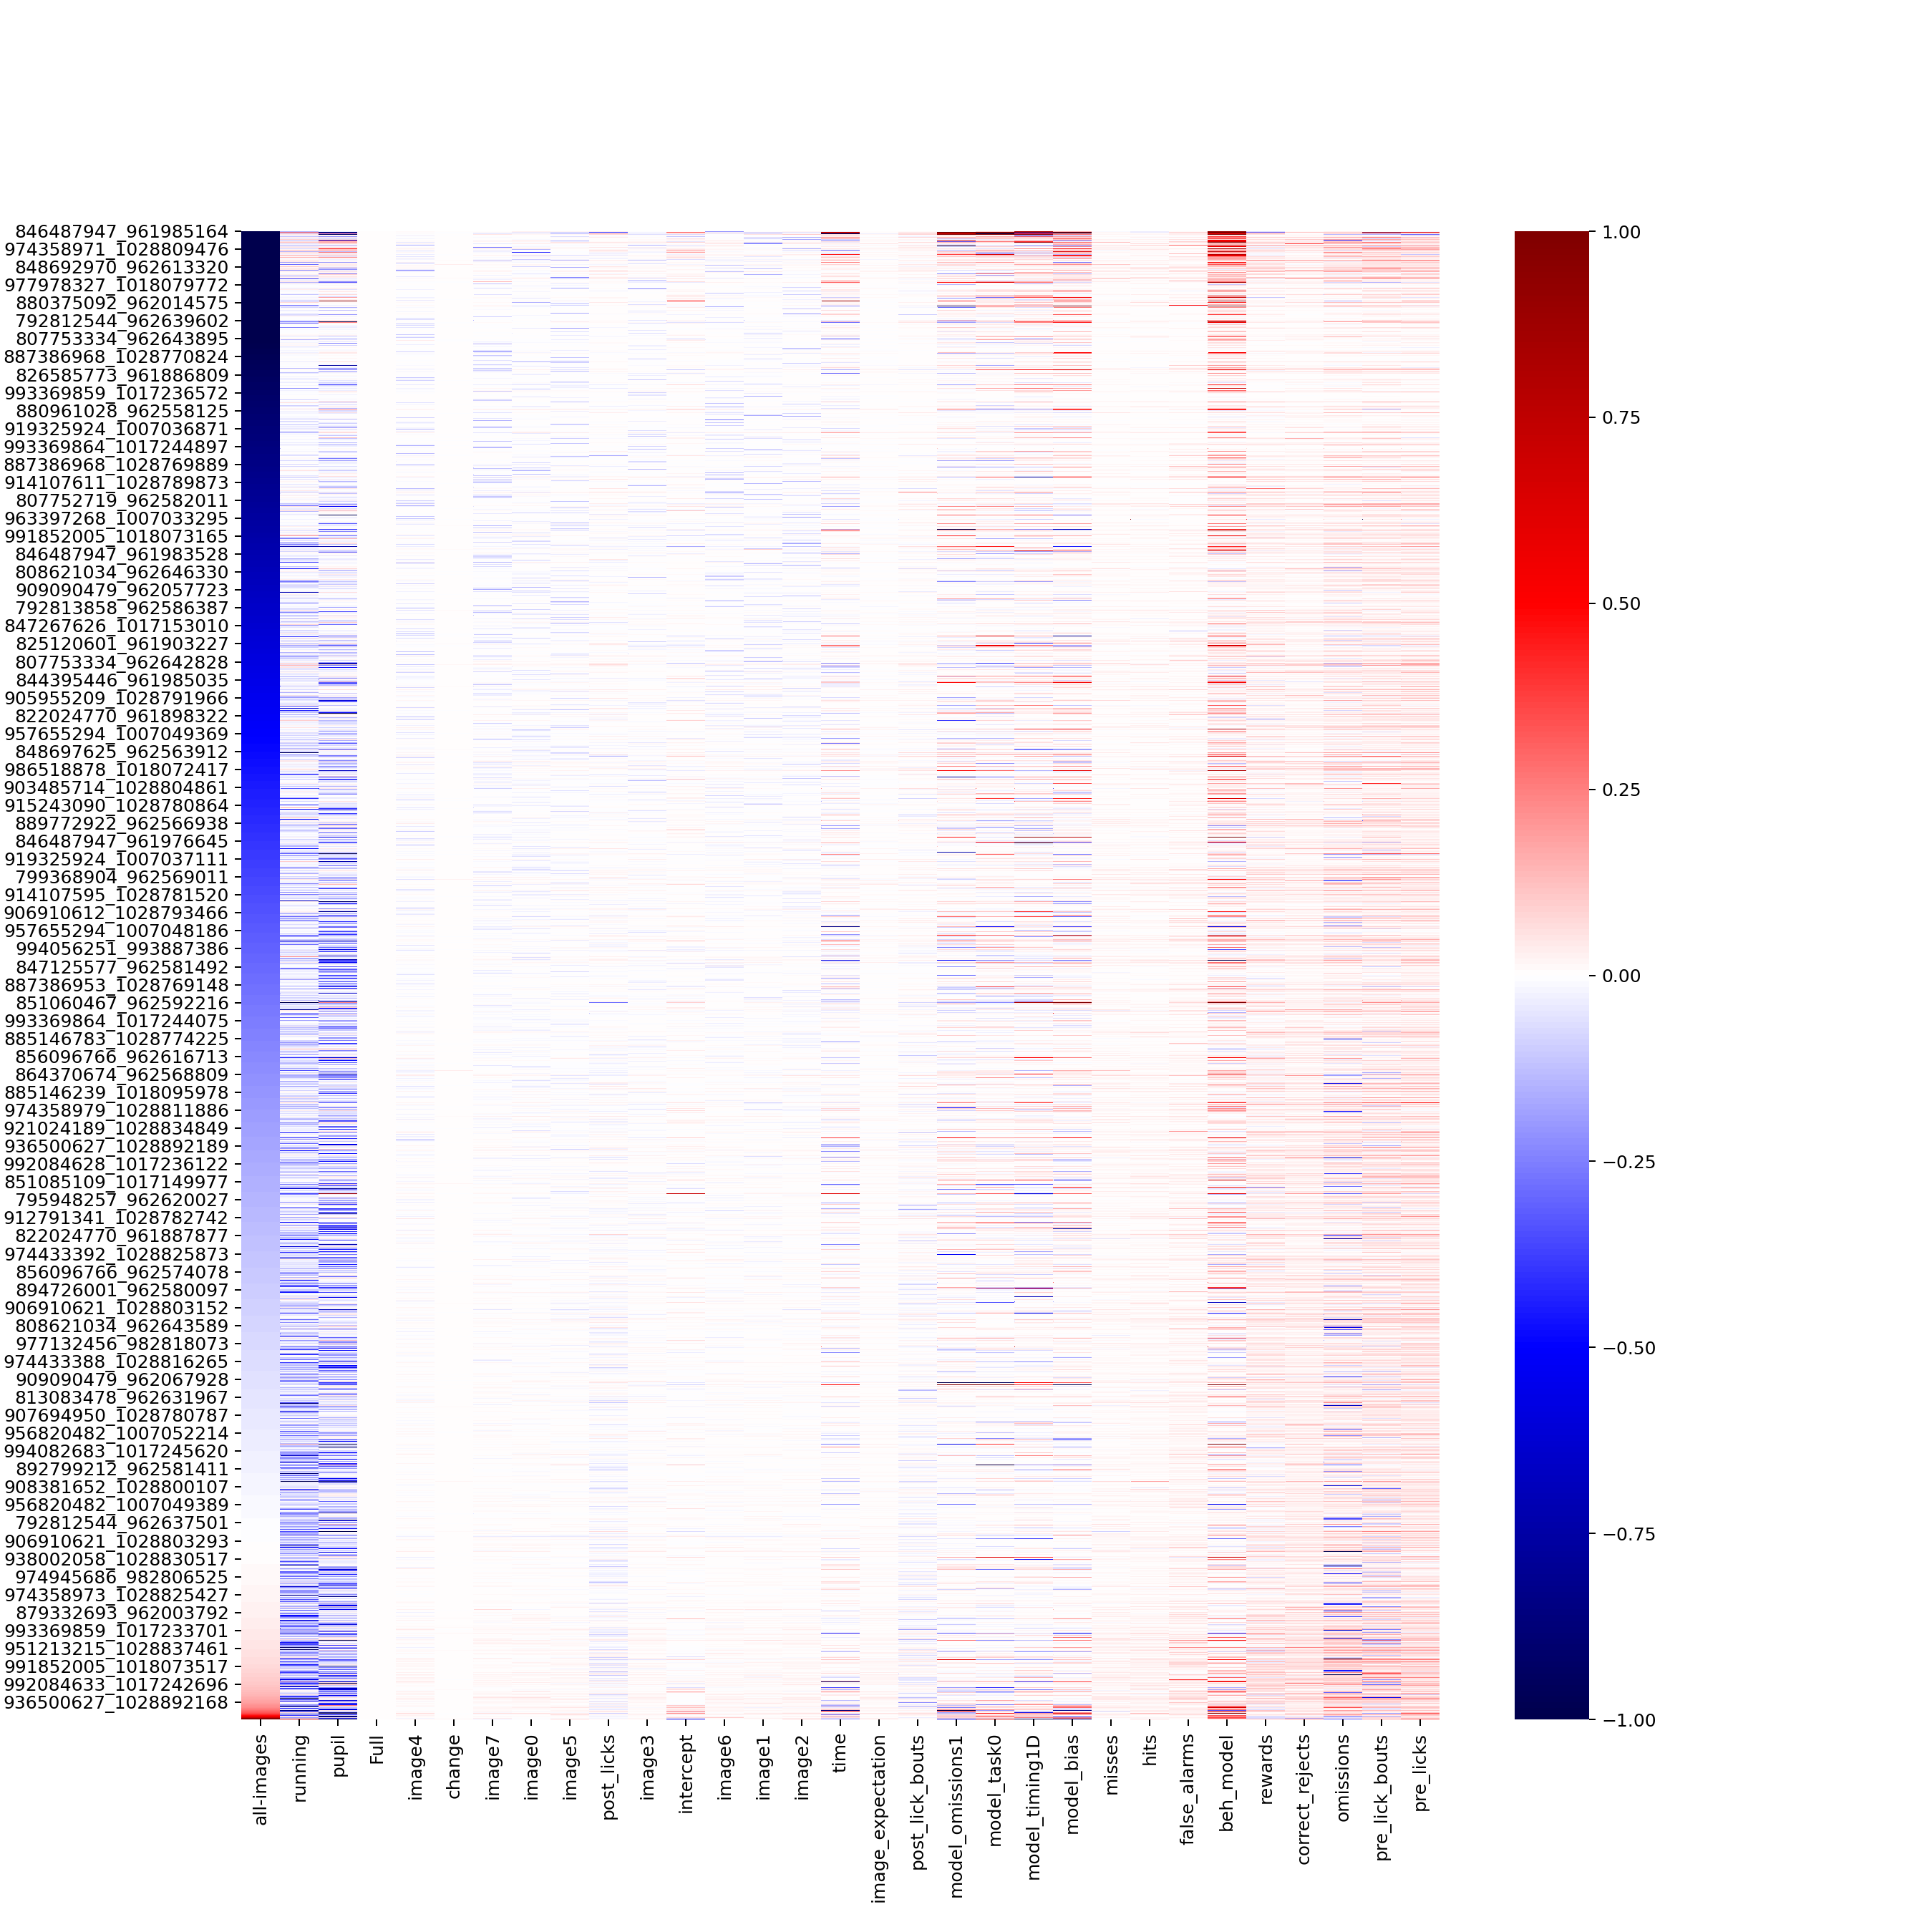

In [48]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(
    rspm.set_index('identifier')[sorted_cols].sort_values(by=['all-images']),
    ax=ax,
    vmin=-1,
    vmax=1,
    cmap='seismic'
)

In [49]:
import umap

reducer_2d = umap.UMAP(n_components=2)
reducer_3d = umap.UMAP(n_components=3)

embedding_2d = reducer_2d.fit_transform(rspm[cols_for_clustering])
embedding_3d = reducer_3d.fit_transform(rspm[cols_for_clustering])
embedding_3d.shape

(26795, 3)

In [50]:
rspm['umap_3d_embedding_0'] = embedding_3d[:, 0]
rspm['umap_3d_embedding_1'] = embedding_3d[:, 1]
rspm['umap_3d_embedding_2'] = embedding_3d[:, 2]

rspm['umap_2d_embedding_0'] = embedding_2d[:, 0]
rspm['umap_2d_embedding_1'] = embedding_2d[:, 1]

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15)
umap_cols = ['umap_3d_embedding_0','umap_3d_embedding_1','umap_3d_embedding_2']
rspm['k_means_on_3d_umap'] = kmeans.fit_predict(rspm[umap_cols])
rspm['k_means_on_3d_umap'].value_counts()

2     2724
3     2499
7     2332
12    2319
14    2301
4     2013
5     1942
9     1618
6     1595
10    1581
0     1448
1     1349
13    1268
11    1063
8      743
Name: k_means_on_3d_umap, dtype: int64

<IPython.core.display.Javascript object>


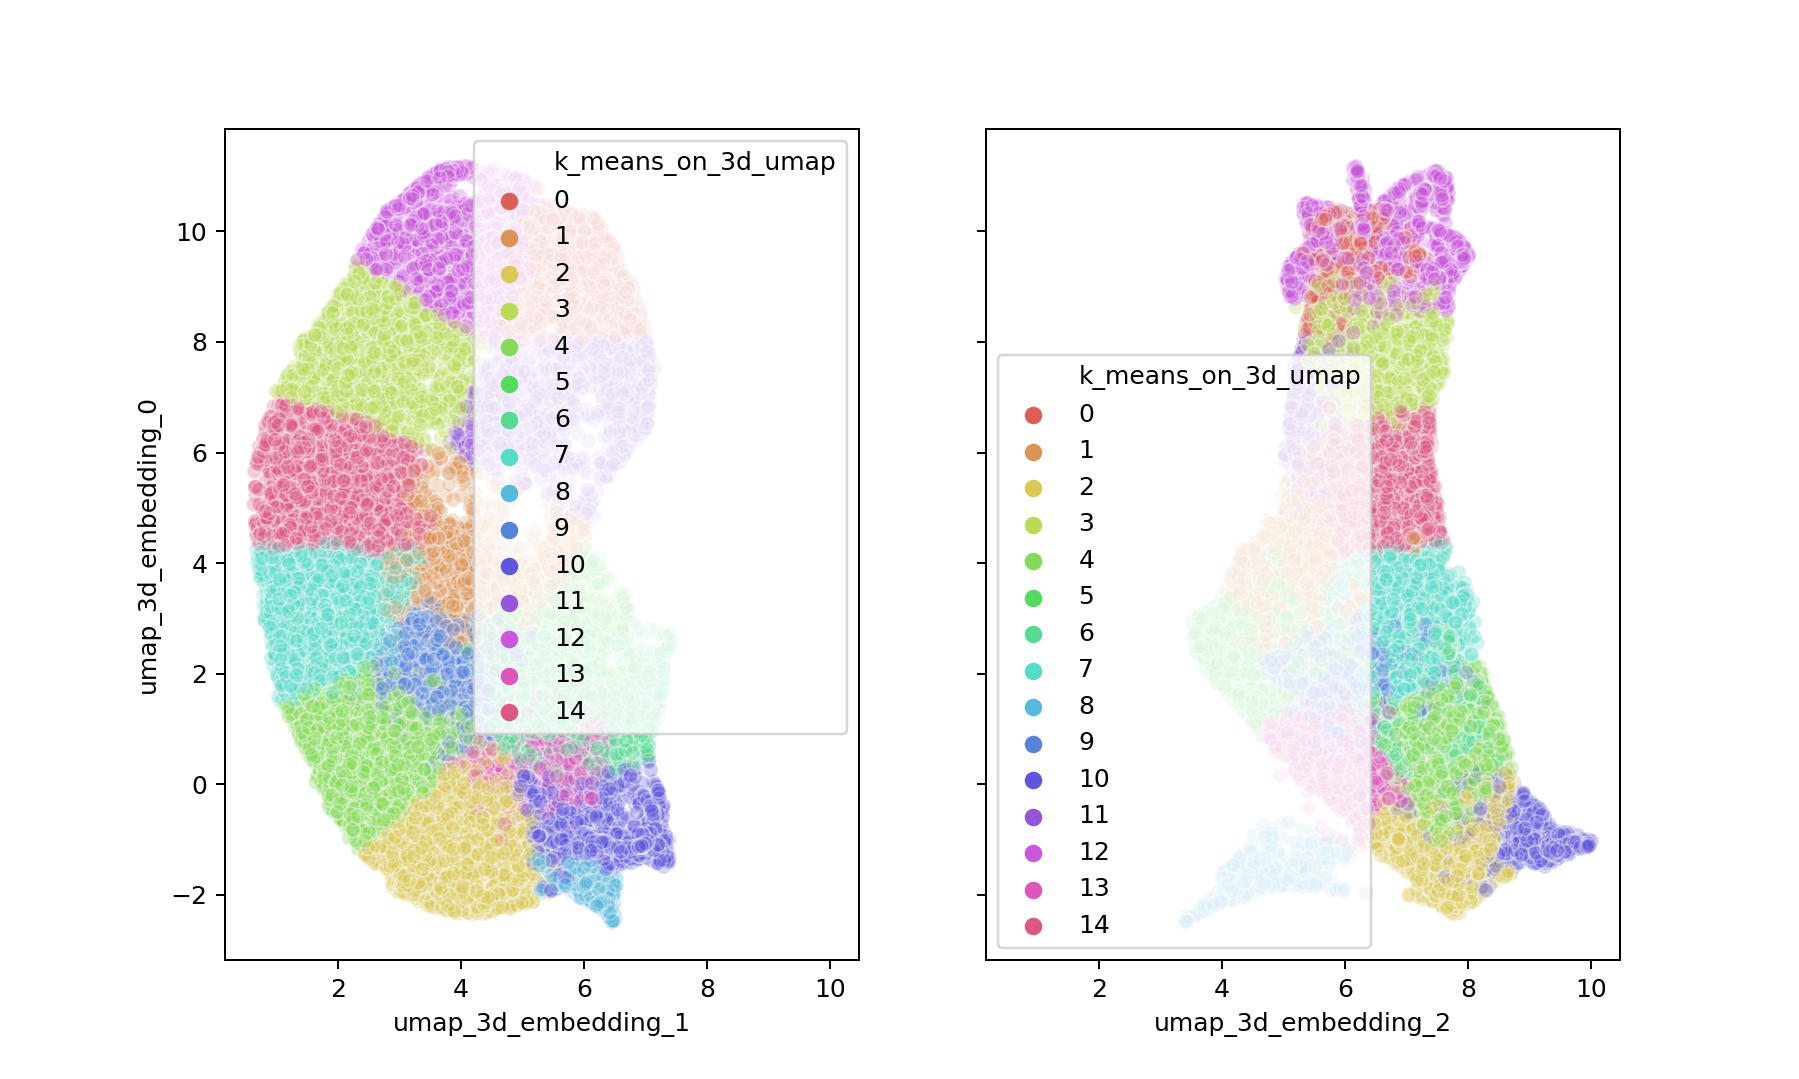

In [52]:
fig,ax=plt.subplots(1,2,figsize=(10,6),sharey=True,sharex=True)
sns.scatterplot(
    x='umap_3d_embedding_1', 
    y='umap_3d_embedding_0',
    hue='k_means_on_3d_umap',
    palette=sns.color_palette("hls", len(rspm['k_means_on_3d_umap'].unique())),
    data=rspm,
    legend='full',
    alpha=0.3,
    ax=ax[0],
)
sns.scatterplot(
    x='umap_3d_embedding_2', 
    y='umap_3d_embedding_0',
    hue='k_means_on_3d_umap',
    palette=sns.color_palette("hls", len(rspm['k_means_on_3d_umap'].unique())),
    data=rspm,
    legend='full',
    alpha=0.3,
    ax=ax[1],
)

In [53]:
import plotly.express as px
fig = px.scatter_3d(
    rspm, 
    x='umap_3d_embedding_0', 
    y='umap_3d_embedding_1', 
    z='umap_3d_embedding_2',
    color='k_means_on_3d_umap'
)
fig.update_layout(
    margin=dict(l=30, r=30, t=10, b=10),
    width=1200,
    height=1000,
)
fig.write_html("/home/dougo/code/dougollerenshaw.github.io/figures_to_share/2020.08.18_k_means_on_umap.html")
fig.show()

<IPython.core.display.Javascript object>


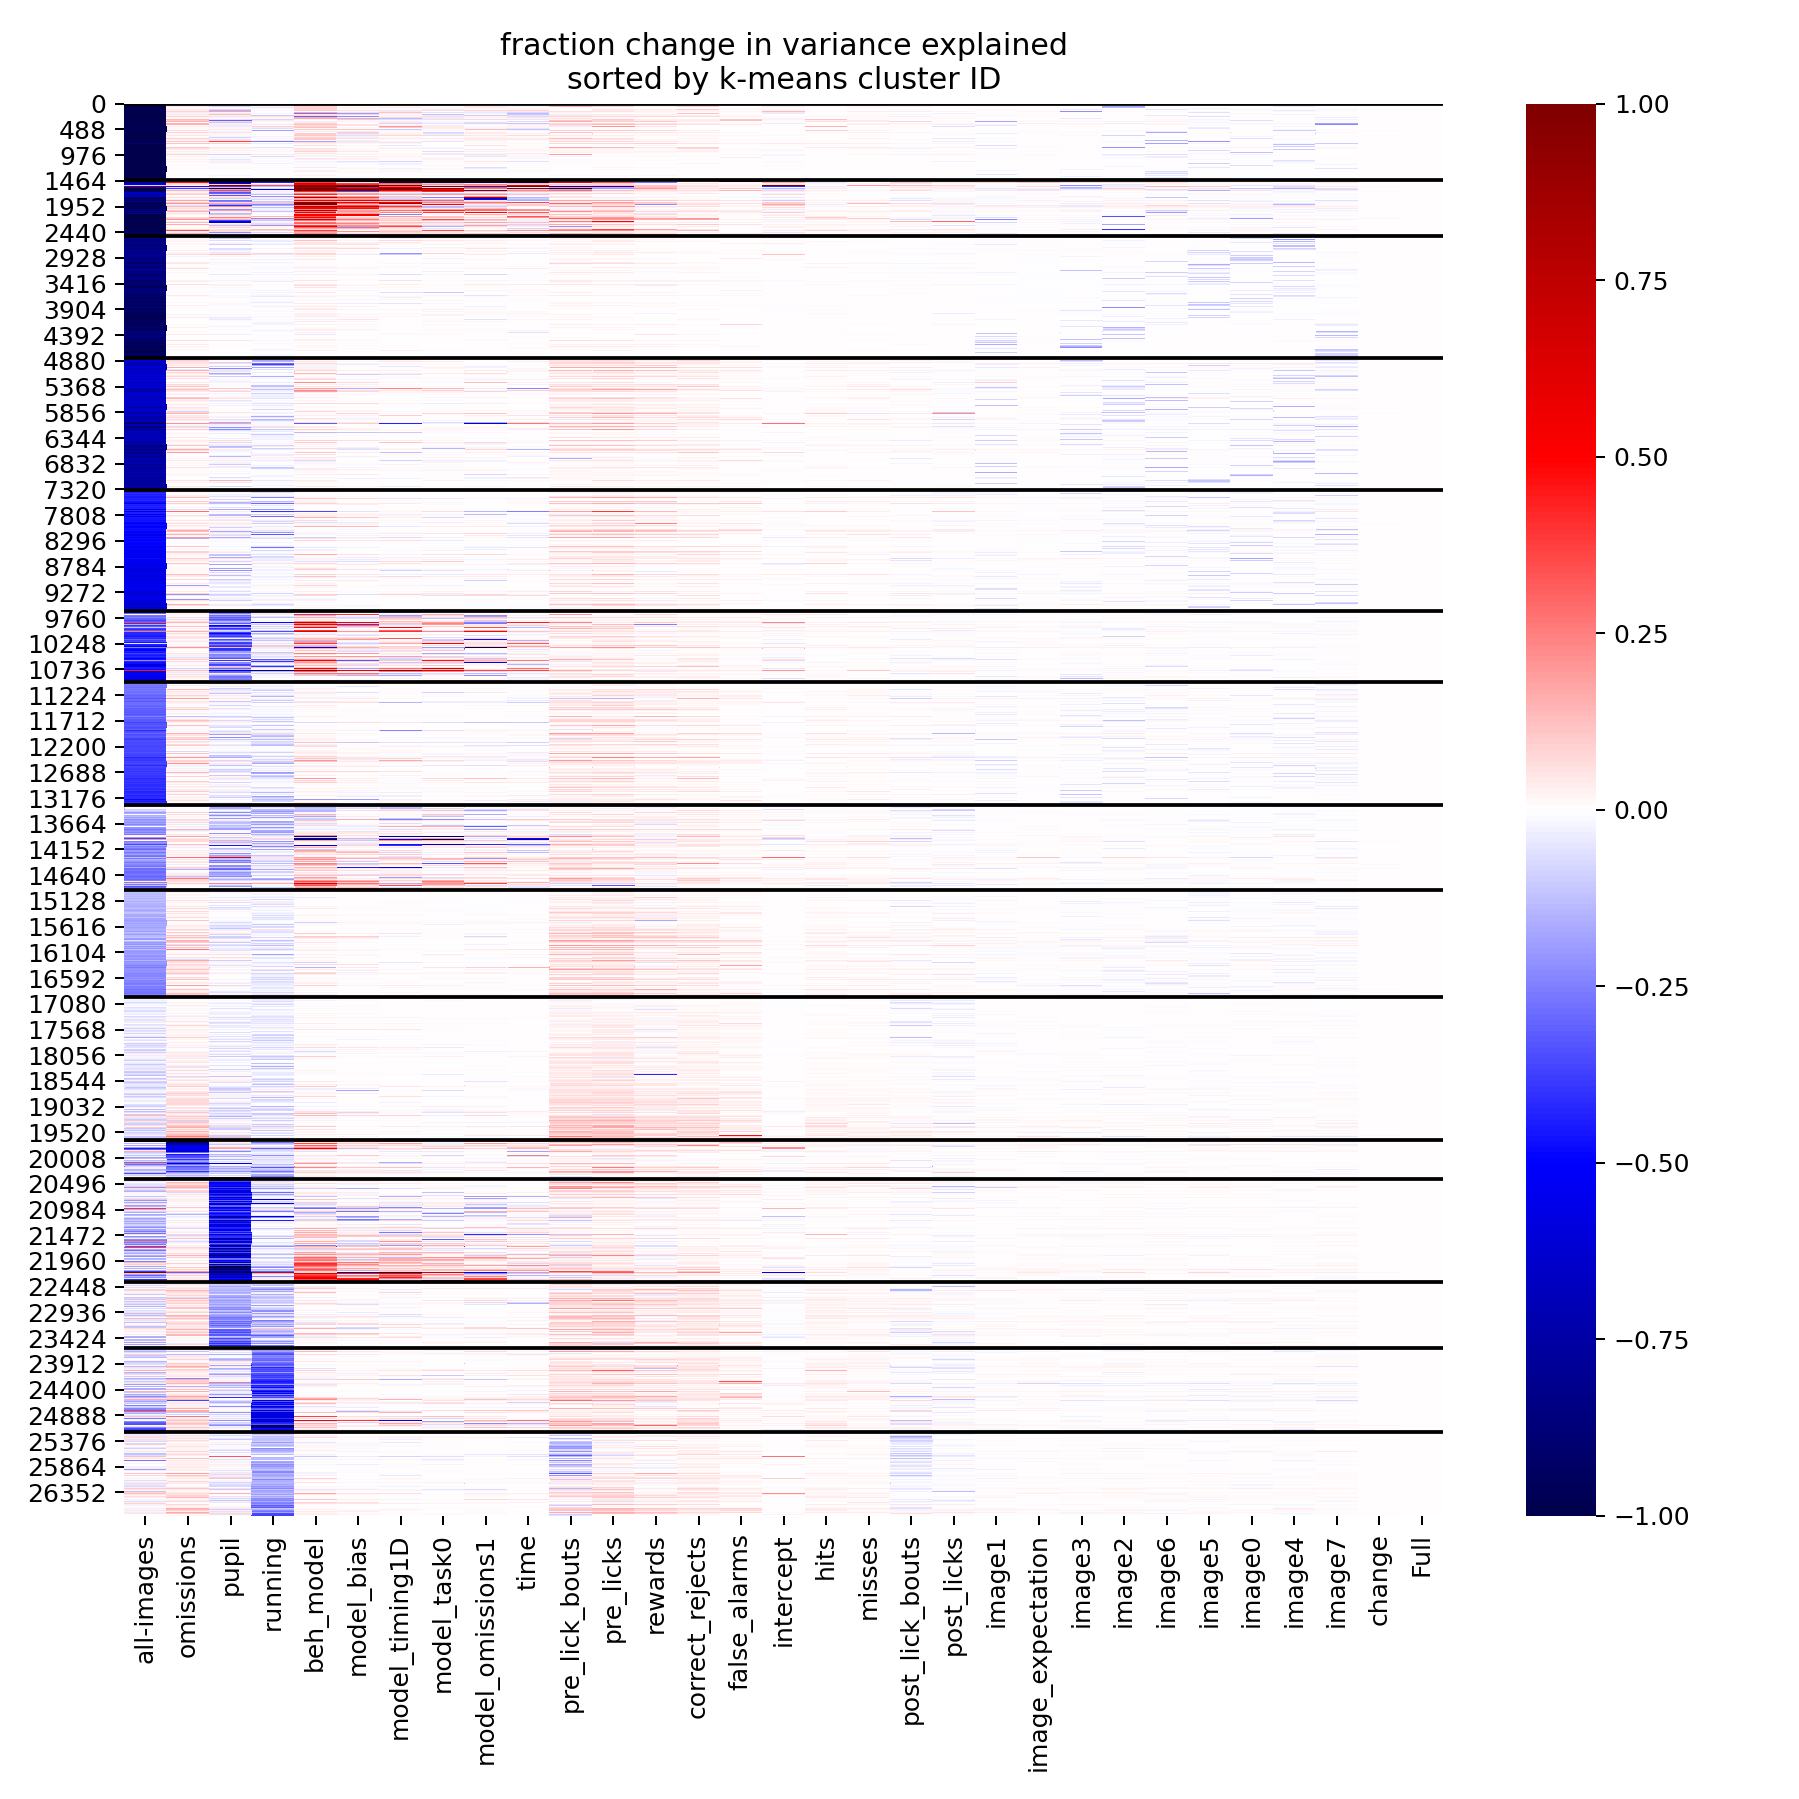

In [57]:
fig,ax=plt.subplots(figsize=(10,10))

umap_axes = ['umap_3d_embedding_0','umap_3d_embedding_1','umap_3d_embedding_2']
data = rspm[['k_means_on_3d_umap'] + umap_axes + list(cols_for_clustering)].sort_values(by=['k_means_on_3d_umap','umap_3d_embedding_0','umap_3d_embedding_1','umap_3d_embedding_2']).reset_index()
cluster_column_name = 'k_means_on_3d_umap'
for cluster_id in data[cluster_column_name].unique():
    data_subset = data.query("{} == {}".format(cluster_column_name, cluster_id))
    
    data.loc[data_subset.index,'dominant_dropout']=data_subset[cols_for_clustering].median(axis=0).idxmin()
    data.loc[data_subset.index,'dominant_dropout_median']=data_subset[cols_for_clustering].median(axis=0).min()
    


data_to_plot = (data
     .sort_values(by=['dominant_dropout','dominant_dropout_median','k_means_on_3d_umap','umap_3d_embedding_0','umap_3d_embedding_1','umap_3d_embedding_2'])
     .reset_index(drop=True)
    )

data_to_plot['cluster_transition'] = data_to_plot['k_means_on_3d_umap'] != data_to_plot['k_means_on_3d_umap'].shift()
for idx,row in data_to_plot.query('cluster_transition').iterrows():
    ax.axhline(idx,color='black')

sorted_cols = list(data_to_plot.query('cluster_transition')['dominant_dropout'].unique())
# cols_by_effect_size = list(data[cols_for_clustering].median(axis=0).abs().sort_values(ascending=False).index)
cols_by_effect_size = list(data[cols_for_clustering].quantile(0.99).abs().sort_values(ascending=False).index)

sorted_cols += [col for col in cols_by_effect_size if col not in sorted_cols]

sns.heatmap(
    data_to_plot.drop(columns=['index','k_means_on_3d_umap','dominant_dropout_median','dominant_dropout','cluster_transition']+umap_axes)[sorted_cols],
    ax=ax,
    vmin=-1,
    vmax=1,
    cmap='seismic'
)
ax.set_title('fraction change in variance explained\nsorted by k-means cluster ID')
fig.tight_layout()